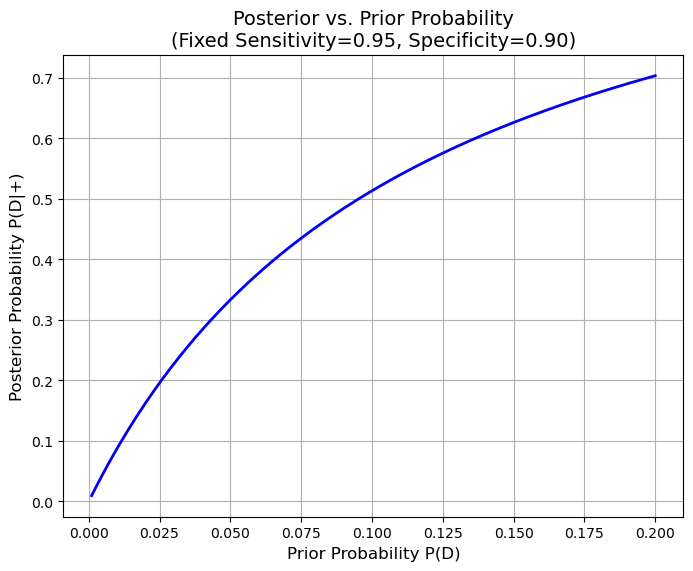

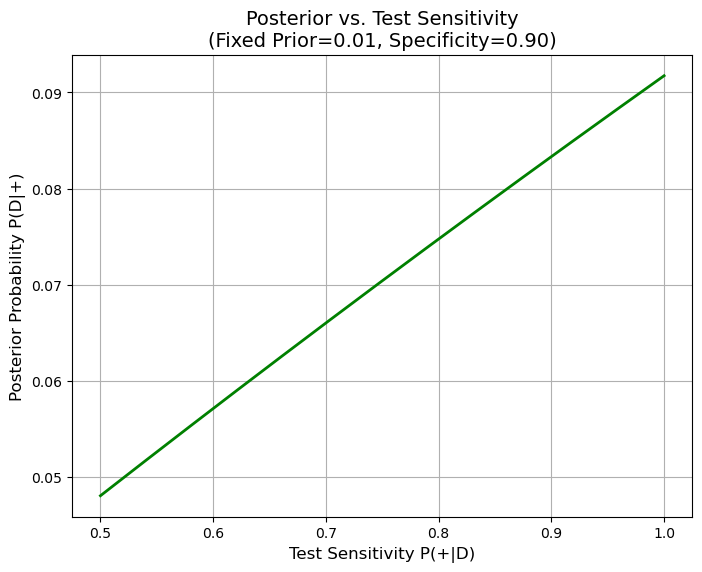

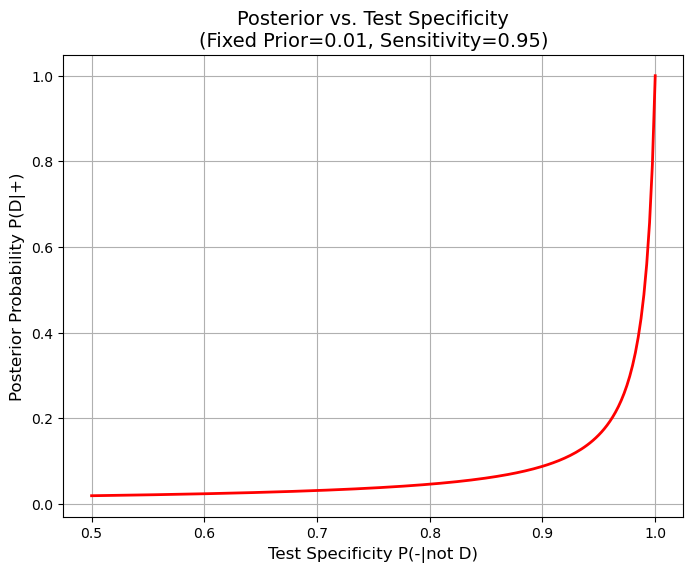

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bayes_posterior(prior, sensitivity, specificity):
    """
    Parameters:
        prior       : P(D) - Prior probability of disease.
        sensitivity : P(+|D) - Probability of a positive test given disease (true positive rate).
        specificity : P(-|not D) - Probability of a negative test given no disease.
                      The false positive rate is (1 - specificity).
    
    Returns:
        Posterior probability P(D|+).
    """
    numerator = sensitivity * prior
    denominator = numerator + (1 - specificity) * (1 - prior)
    return numerator / denominator

# Plot 1: Varying Prior Probability
# Fixed sensitivity and specificity:
sensitivity_fixed = 0.95
specificity_fixed = 0.90
priors = np.linspace(0.001, 0.20, 200)
posteriors_prior = [bayes_posterior(p, sensitivity_fixed, specificity_fixed) for p in priors]

plt.figure(figsize=(8, 6))
plt.plot(priors, posteriors_prior, color='blue', linewidth=2)
plt.xlabel("Prior Probability P(D)", fontsize=12)
plt.ylabel("Posterior Probability P(D|+)", fontsize=12)
plt.title("Posterior vs. Prior Probability\n(Fixed Sensitivity=0.95, Specificity=0.90)", fontsize=14)
plt.grid(True)
plt.show()

# Plot 2: Varying Sensitivity
# Fixed prior and specificity:
prior_fixed = 0.01
sensitivities = np.linspace(0.5, 1.0, 200)
posteriors_sens = [bayes_posterior(prior_fixed, s, specificity_fixed) for s in sensitivities]

plt.figure(figsize=(8, 6))
plt.plot(sensitivities, posteriors_sens, color='green', linewidth=2)
plt.xlabel("Test Sensitivity P(+|D)", fontsize=12)
plt.ylabel("Posterior Probability P(D|+)", fontsize=12)
plt.title("Posterior vs. Test Sensitivity\n(Fixed Prior=0.01, Specificity=0.90)", fontsize=14)
plt.grid(True)
plt.show()

# Plot 3: Varying Specificity 
# Fixed prior and sensitivity:
specificities = np.linspace(0.5, 1.0, 200)
posteriors_spec = [bayes_posterior(prior_fixed, sensitivity_fixed, s) for s in specificities]

plt.figure(figsize=(8, 6))
plt.plot(specificities, posteriors_spec, color='red', linewidth=2)
plt.xlabel("Test Specificity P(-|not D)", fontsize=12)
plt.ylabel("Posterior Probability P(D|+)", fontsize=12)
plt.title("Posterior vs. Test Specificity\n(Fixed Prior=0.01, Sensitivity=0.95)", fontsize=14)
plt.grid(True)
plt.show()

Variation in Prior Probability: 
When the disease prevalence increases, even modestly, the posterior probability rises nonlinearly. This means that in populations where the disease is more common, the same test result would be far more indicative of a true positive.

Variation in Sensitivity: 
With the prior fixed at a low level, improvements in sensitivity lead to an increase in the posterior probability. However, because the disease is rare, the gains from increasing sensitivity have a limited effect compared to changes in specificity.

Variation in Specificity: 
Improvements in specificity have a pronounced effect on the posterior probability. Since false positives dominate when the disease is rare, even a slight enhancement in specificity can significantly boost the reliability of a positive test result.
